### **Dataset 2019**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/diabetes_dataset__2019.csv')

In [ ]:
df.head()

In [ ]:
df.info()

### **Preprocessing**

### Null **Values**

In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

### Missing value **Imputaion** **

In [ ]:
df.dropna(subset=['Diabetic'], inplace=True)

In [ ]:
df.dropna(subset=['Pdiabetes'], inplace=True)

In [ ]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True )


In [ ]:

df['Pregancies'].fillna(df['Pregancies'].median(), inplace = True )

In [ ]:
row_to_drop = 17  # index of the row to drop

# Drop the specified row from the DataFrame
df = df.drop(row_to_drop)

In [ ]:
df_imputed = df.fillna(df.mean())




<ipython-input-10-848fae56f2e6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imputed = df.fillna(df.mean())


### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:

df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df.iloc[:, -2] = labelencoder.fit_transform(df.iloc[:, -2])
df.iloc[:, -3] = labelencoder.fit_transform(df.iloc[:, -3])
df.iloc[:, -5] = labelencoder.fit_transform(df.iloc[:, -5])
df.iloc[:, -6] = labelencoder.fit_transform(df.iloc[:, -6])
df.iloc[:, -7] = labelencoder.fit_transform(df.iloc[:, -7])
df.iloc[:, -8] = labelencoder.fit_transform(df.iloc[:, -8])
df.iloc[:, -11] = labelencoder.fit_transform(df.iloc[:, -11])
df.iloc[:, -12] = labelencoder.fit_transform(df.iloc[:, -12])
df.iloc[:, -14] = labelencoder.fit_transform(df.iloc[:, -14])
df.iloc[:, -15] = labelencoder.fit_transform(df.iloc[:, -16])
df.iloc[:, -17] = labelencoder.fit_transform(df.iloc[:, -17])
df.iloc[:, -18] = labelencoder.fit_transform(df.iloc[:, -18])
df.iloc[:, -16] = labelencoder.fit_transform(df.iloc[:, -16])

### **Outlier Removal**

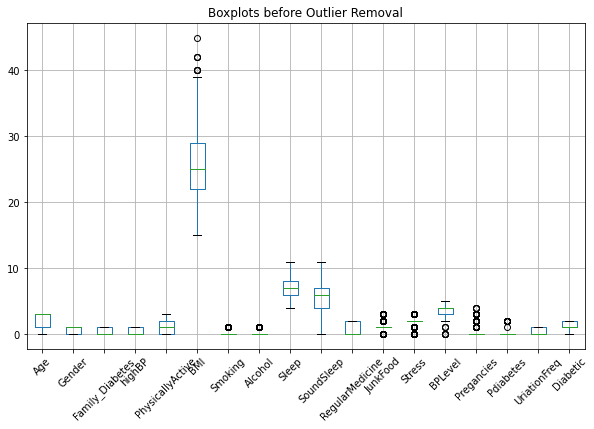

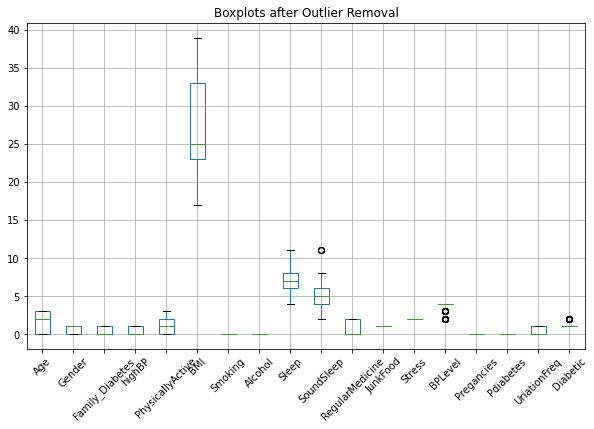

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Boxplots before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot boxplots after outlier removal
plt.figure(figsize=(10,6))
df_out.boxplot()
plt.title('Boxplots after Outlier Removal')
plt.xticks(rotation=45)
plt.show()

### Feature Selection

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.8 MB/s eta 0:00:00


In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import shap

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Train Shape**

In [ ]:
X_train.shape

(759, 17)

### **Test Shape**

In [ ]:
X_test.shape

(190, 17)

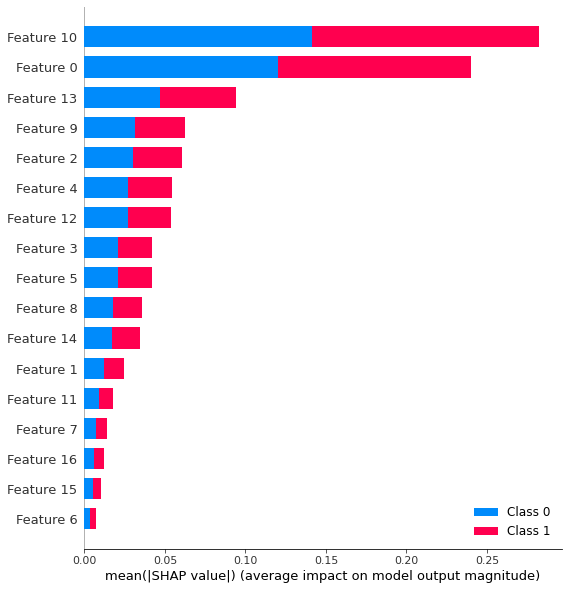

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Explain the model predictions using SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot the feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Print the feature names with their corresponding SHAP values
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_values_2d = np.squeeze(shap_values)
#shap_df = pd.DataFrame(shap_values_2d, columns=X_train_df.columns)
#shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

shap_df = shap_df.abs().mean().sort_values(ascending=False).reset_index()
shap_df.columns = ['Feature', 'SHAP Value']
print(shap_df)
print(shap_values.shape)

In [ ]:
df = df.drop(['Smoking', 'Alcohol','Pdiabetes','UriationFreq'], axis=1)

### **Features Selected**

In [ ]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Sleep', 'SoundSleep', 'RegularMedicine', 'JunkFood', 'Stress',
       'BPLevel', 'Pregancies', 'Diabetic'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, space_eval
from hyperopt.pyll.stochastic import sample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import optuna

### **K-fold**

In [ ]:
# assume X is your feature data and y is your target data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
X_train.shape

(759, 17)

### **Random Forest Hyperparameter tuning**

In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skopt import BayesSearchCV

In [ ]:
def objective_rfc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    rfc = RandomForestClassifier(random_state=42, **params)
    score = np.mean(cross_val_score(rfc, X_train, y_train, cv=5))
    return score

search_rfc = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces={
        'n_estimators': (100, 1000),
        'max_depth': (2, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 10),
        'max_features': ['sqrt', 'log2', None]
    },
    n_iter=50,
    cv=3,
    scoring='accuracy'
)

search_rfc.fit(X_train, y_train)
y_pred = search_rfc.predict(X_test)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

#print("Accuracy of the stacking model:", accuracy)

# Print the best parameters for Random Forest
print("Best params for Random Forest:", search_rfc.best_params_)

The objective has been evaluated at this point before.


Best params for Random Forest: OrderedDict([('max_depth', 50), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100)])


XG Boost Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for Gradient Boosting using Optuna
def objective_gbc(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    gbc = GradientBoostingClassifier(random_state=42, **params)
    score = np.mean(cross_val_score(gbc, X_train, y_train, cv=5))
    return score

search_gbc = BayesSearchCV(
estimator=GradientBoostingClassifier(random_state=42),
search_spaces={
'n_estimators': (100, 1000),
'max_depth': (2, 50),
'learning_rate': (0.001, 1.0),
'min_samples_split': (2, 10),
'min_samples_leaf': (1, 10),
'max_features': ['sqrt', 'log2', None]
},
n_iter=50,
cv=3,
scoring='accuracy'
)
search_gbc.fit(X_train, y_train)
#y_pred = search_gbc.predict(X_test)

#Calculate the accuracy
#accuracy = accuracy_score(y_test, y_pred)

#print("Accuracy of the stacking model:", accuracy)
#Print the best parameters for Gradient Boosting
print("Best params for Gradient Boosting:", search_gbc.best_params_)



Best params for Gradient Boosting: OrderedDict([('learning_rate', 0.6216062685315905), ('max_depth', 22), ('max_features', 'log2'), ('min_samples_leaf', 5), ('min_samples_split', 2), ('n_estimators', 1000)])


### **SVM hyperparameter Tuning**

In [ ]:
#Hyperparameter tuning for SVM using Bayesian Optimization
svm_params = {
'C': (1e-6, 1e+6, 'log-uniform'),
'gamma': (1e-6, 1e+1, 'log-uniform'),
'degree': (1, 8),
'kernel': ['rbf']
}

svm_bayes = BayesSearchCV(
SVC(probability=True),
svm_params,
n_iter=50,
cv=3
)

svm_bayes.fit(X_train, y_train)
print("Best params for SVM:", svm_bayes.best_params_)

Best params for SVM: OrderedDict([('C', 1000000.0), ('degree', 8), ('gamma', 0.001034923024026283), ('kernel', 'rbf')])


# Base Classifiers and Meta Classifiers

In [ ]:
#Create the base classifiers with their best hyperparameters
gnb = GaussianNB()
rfc = RandomForestClassifier(random_state=42, **search_rfc.best_params_)
gbc = GradientBoostingClassifier(random_state=42, **search_gbc.best_params_)
svm = SVC(**svm_bayes.best_params_, probability=True)

### **Classification**

In [ ]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nb =  GaussianNB()
lr=LogisticRegression()
# Define the stacking ensemble classifier
svm = SVC(random_state=42, probability=True)
stacking_clf = StackingClassifier(
    estimators=[('lr', rf), ('gbc', gb), ('rfc', nb)],
    final_estimator=svm
)    
    # Fit the stacking ensemble classifier
    stacking_clf.fit(X_train, y_train)
    
    # Compute accuracy on the test set
    y_pred = stacking_clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and their corresponding accuracy score
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)


[I 2023-02-24 16:27:33,095] A new study created in memory with name: no-name-155b2213-5293-40d5-8750-e5c25a494b50
[I 2023-02-24 16:27:35,848] Trial 0 finished with value: 0.9736842105263158 and parameters: {'rf_n_estimators': 162, 'gb_n_estimators': 142}. Best is trial 0 with value: 0.9736842105263158.
[I 2023-02-24 16:27:38,001] Trial 1 finished with value: 0.9736842105263158 and parameters: {'rf_n_estimators': 128, 'gb_n_estimators': 30}. Best is trial 0 with value: 0.9736842105263158.
[I 2023-02-24 16:27:44,057] Trial 2 finished with value: 0.9736842105263158 and parameters: {'rf_n_estimators': 156, 'gb_n_estimators': 81}. Best is trial 0 with value: 0.9736842105263158.
[I 2023-02-24 16:27:50,510] Trial 3 finished with value: 0.9736842105263158 and parameters: {'rf_n_estimators': 144, 'gb_n_estimators': 178}. Best is trial 0 with value: 0.9736842105263158.
[I 2023-02-24 16:27:53,095] Trial 4 finished with value: 0.9736842105263158 and parameters: {'rf_n_estimators': 62, 'gb_n_estima

Best hyperparameters: {'rf_n_estimators': 182, 'gb_n_estimators': 29}
Best accuracy: 0.9789473684210527


### **Model Saving**

In [ ]:
import pickle
pickle.dump(stacking_clf,open('2019_973.pkl','wb'))
model=pickle.load(open('2019_973.pkl','rb'))
model

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=189,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=165,
                                                           random_state=42)),
                               ('nb', GaussianNB())],
                   final_estimator=SVC(probability=True, random_state=42))

### **Severity Level Estimation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Load dataset
diabetes = pd.read_csv('/content/drive/MyDrive/db_1.csv')

### Null **Values**

In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

### Missing value **Imputaion** **

In [ ]:
df.dropna(subset=['Diabetic'], inplace=True)

In [ ]:
df.dropna(subset=['Pdiabetes'], inplace=True)

In [ ]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True )


In [ ]:

df['Pregancies'].fillna(df['Pregancies'].median(), inplace = True )

In [ ]:
row_to_drop = 17  # index of the row to drop

# Drop the specified row from the DataFrame
df = df.drop(row_to_drop)

In [ ]:
df_imputed = df.fillna(df.mean())




<ipython-input-10-848fae56f2e6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imputed = df.fillna(df.mean())


### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:

df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df.iloc[:, -2] = labelencoder.fit_transform(df.iloc[:, -2])
df.iloc[:, -3] = labelencoder.fit_transform(df.iloc[:, -3])
df.iloc[:, -5] = labelencoder.fit_transform(df.iloc[:, -5])
df.iloc[:, -6] = labelencoder.fit_transform(df.iloc[:, -6])
df.iloc[:, -7] = labelencoder.fit_transform(df.iloc[:, -7])
df.iloc[:, -8] = labelencoder.fit_transform(df.iloc[:, -8])
df.iloc[:, -11] = labelencoder.fit_transform(df.iloc[:, -11])
df.iloc[:, -12] = labelencoder.fit_transform(df.iloc[:, -12])
df.iloc[:, -14] = labelencoder.fit_transform(df.iloc[:, -14])
df.iloc[:, -15] = labelencoder.fit_transform(df.iloc[:, -16])
df.iloc[:, -17] = labelencoder.fit_transform(df.iloc[:, -17])
df.iloc[:, -18] = labelencoder.fit_transform(df.iloc[:, -18])
df.iloc[:, -16] = labelencoder.fit_transform(df.iloc[:, -16])

### **Outlier Removal**

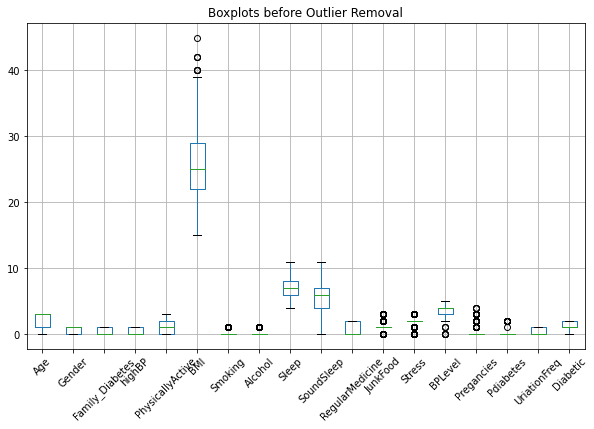

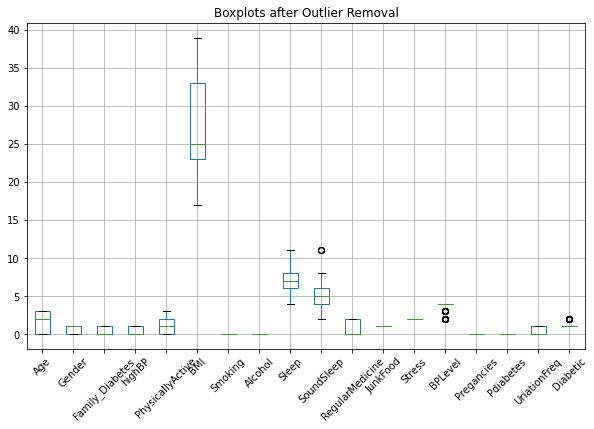

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Boxplots before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot boxplots after outlier removal
plt.figure(figsize=(10,6))
df_out.boxplot()
plt.title('Boxplots after Outlier Removal')
plt.xticks(rotation=45)
plt.show()

### Feature Selection

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.8 MB/s eta 0:00:00


In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import shap

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Train Shape**

In [ ]:
X_train.shape

(759, 17)

### **Test Shape**

In [ ]:
X_test.shape

(190, 17)

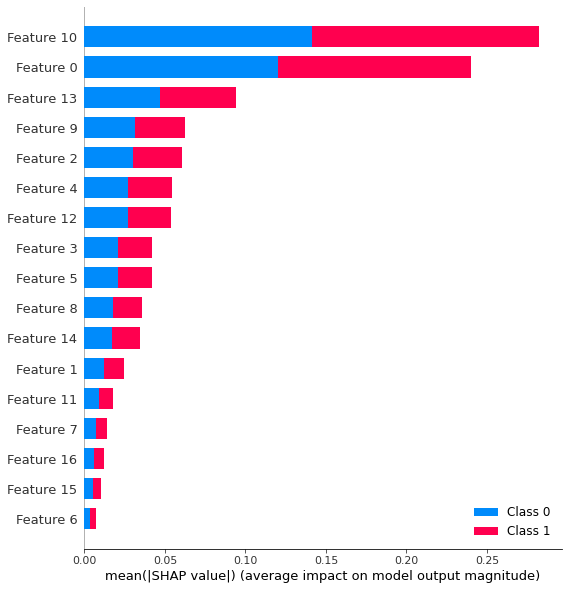

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Explain the model predictions using SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot the feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Print the feature names with their corresponding SHAP values
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_values_2d = np.squeeze(shap_values)
#shap_df = pd.DataFrame(shap_values_2d, columns=X_train_df.columns)
#shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

shap_df = shap_df.abs().mean().sort_values(ascending=False).reset_index()
shap_df.columns = ['Feature', 'SHAP Value']
print(shap_df)
print(shap_values.shape)

In [ ]:
df = df.drop(['Smoking', 'Alcohol','Pdiabetes','UriationFreq'], axis=1)

### **Features Selected**

In [ ]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Sleep', 'SoundSleep', 'RegularMedicine', 'JunkFood', 'Stress',
       'BPLevel', 'Pregancies', 'Diabetic'],
      dtype='object')

### **Clustering For severity level Estimation**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(df)

# Assign severity levels
labels = hc.labels_
severity_levels = []
for label in labels:
    if label == 0:
        severity_levels.append('Low')
    elif label == 1:
        severity_levels.append('Medium')
    else:
        severity_levels.append('High')

In [ ]:
df['Severity'] = severity_levels

In [ ]:
labels = df['Severity']

# Instantiate a LabelEncoder object and fit_transform the labels
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
print("Class names with corresponding labels:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")


Class names with corresponding labels:
High: 0
Low: 1
Medium: 2


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [ ]:
df = df.drop('Diabetic',axis=1)

In [ ]:
y1 = df['Severity']
x1 = df.drop(columns= ['Severity'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.2, random_state=0)

model1 = LogisticRegression()
model1.fit(X_train2, y_train2)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model1.predict(X_test2)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9814814814814815


In [ ]:
import pickle
pickle.dump(model1,open('cl19.pkl','wb'))
model=pickle.load(open('cl19.pkl','rb'))
model

LogisticRegression()